# Исследование заведений общественного питания Москвы

- Автор: Зотова Дарья
- Дата: 11.07.2025

### Краткое описание проекта

Инвесторы фонда Shut Up and Take My Money планируют открыть заведение общественного питания в Москве, но пока не определились с форматом, расположением и ценовой категорией. Чтобы принять обоснованные решения, необходимо проанализировать текущую ситуацию на рынке. В рамках проекта проводится исследование заведений Москвы: их категорий, географии, ценового сегмента, рейтингов и других характеристик. Анализ основан на данных Яндекс Карт и Яндекс Бизнес по состоянию на лето 2022 года. Полученные результаты помогут выявить тренды и выбрать наиболее перспективную стратегию запуска.

### Цель и задачи проекта

**Цель:** провести исследовательский анализ заведений общественного питания Москвы и выявить ключевые тенденции по форматам, расположению и ценам.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить распределение заведений по категориям, представленным в датасете;
    - проанализировать распределение заведений по административным районам Москвы и внутри ЦАО по категориям;
    - исследовать соотношение сетевых и несетевых заведений в целом и по категориям;
    - проанализировать количество посадочных мест и определить типичное число посадочных мест для каждой категории;
    - изучить распределение средних рейтингов по категориям заведений;
    - определить, с какими данными рейтинги заведений коррелируют сильнее всего;
    - исследовать топ-15 сетевых заведений по количеству точек;
    - проанализировать вариацию среднего чека в зависимости от района Москвы.
4. Сформулировать выводы по проведённому анализу.

### Описание данных

Данные состоят из двух датасетов:

- `rest_info.csv` содержит информацию о заведениях общественного питания;
- `rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания.

**Описание датасета `rest_info.csv`:**

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - 0 — заведение не является сетевым;
    - 1 — заведение является сетевым.
- `seats` — количество посадочных мест.

**Описание датасета `rest_price.csv`:**

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽». и так далее.
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

1. Загрузка данных и знакомство с ними
2. Предобработка данных:
    - 2.1. Названия столбцов датафрейма
    - 2.2. Типы данных
    - 2.3. Наличие пропусков в данных
    - 2.4. Дубликаты в данных
    - 2.5. Создание нового столбца
    - 2.6. Промежуточные выводы по предобработке
3. Исследовательский анализ данных
    - 3.1. Исследование распределения заведений по категориям
    - 3.2. Исследование распределение заведений по районам
    - 3.3. Исследование распределение сетевых и несетевых заведений
    - 3.4. Исследование количества посадочных мест
    - 3.5. Исследование рейтинга заведений
    - 3.6. Анализ корреляции рейтинга и других параметров
    - 3.7. Исследование топовых сетевых заведений
    - 3.8. Исследование среднего чека
    - 3.9. Промежуточные выводы по исследовательскому анализу
4. Итоговый вывод и рекомендации
    - 4.1. Общий обзор проделанной работы
    - 4.2. Главные выводы
    - 4.3. Рекомендации

---

## Загрузка данных и знакомство с ними

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [2]:
# Выгружаем данные в переменные rest_info и rest_price
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
# Выводим первые строки датафрейма на экран
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выводим информацию о датафрейме
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов корректно отражают содержащиеся в них данные.
- Значения в столбцах `id`, `name`, `category`, `address`, `district` и `hours` корректно представлены типом `object`. Размерность данных в столбцах `rating` и `chain` можно оптимизировать. Столбец seats содержит целые числа, но представлен типом данных `float64` из-за наличия пропусков.
- Пропуски содержатся в столбцах `hours` и `seats`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `rest_price.csv`.

In [5]:
# Выводим первые строки датафрейма на экран
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:

- Название столбца `price` лучше поменять на `price_level`, `avg_bill` на `avg_bill_text`, `middle_avg_bill` на `avg_bill_price`, `middle_coffee_cup` на `coffee_cup_price`. Новые называния столбцов удобнее для дальнейшего анализа, т.к. более явно передают их содержимое.
- Столбцы `middle_avg_bill` и `middle_coffee_cup` содержат целочисленные значения, но представлены типом данных `float64` из-за наличия пропусков. 
- Пропуски содержатся во всех столбцах, кроме `id`. Больше всего пропусков содержит столбец `middle_coffee_cup`.
- Значения в столбцах соответствуют описанию.

---

Для дальнейшей работы необходимо объединить данные в единый датафрейм с информацией о типе заведения, районе, рейтинге и среднем чеке. Это позволит сравнивать и анализировать рынок по всем признакам сразу. Однако после первичного анализа явно видно, что датасет `rest_info.csv` содержит более чем в два раза больше строк, чем датасет `rest_price.csv`. Самым логичным решением здесь будет левое соединение по столбцу `id`, чтобы объединить данные, не теряя заведений. Это позволит нам гибко анализировать, сегментировать и визуализировать рынок — с ценами и без.

In [7]:
# Соединяем данные в единый датафрейм df
df = rest_info.merge(rest_price, how='left', on='id')

In [8]:
# Выводим первые строки датафрейма на экран
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [9]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


Данные соединены, и информация обо всех заведениях сохранилась.

---

## Предобработка данных

### Названия столбцов датафрейма

Для начала проверим, содержит ли столбец `id` только уникальные значения. Если да — сделаем его индексом датафрейма.

In [10]:
# Считаем количество уникальных значений в столбце id
df['id'].nunique()

8406

Количество уникальных значений в столбце `id` совпадает с количеством строк датафрейма. Это говорит о том, что каждая строка — уникальный идентификатор объекта (в данном случае — заведения). Таким образом, столбец `id` идеально подходит на роль индекса датафрейма.

In [11]:
# Делаем столбец id индексом датафрейма
df.index = df['id']
df = df.drop(columns='id')
df.head()

,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
id,,,,,,,,,,,,
0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


---

Для переименования столбцов используем метод `rename()`, которому передадим словарь с новыми названиями столбцов. Однако сначала выведем все названия на экран — так будет удобнее составлять словарь.

In [12]:
# Выводим названия столбцов
df.columns

Index(['name', 'category', 'address', 'district', 'hours', 'rating', 'chain',
       'seats', 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup'],
      dtype='object')

In [13]:
# Передаём методу rename() словарь с названиями столбцов
df = df.rename(columns={'price': 'price_level',
                        'avg_bill': 'avg_bill_text',
                        'middle_avg_bill': 'avg_bill_price',
                        'middle_coffee_cup': 'coffee_cup_price'})

In [14]:
# Выводим новые названия столбцов
df.columns

Index(['name', 'category', 'address', 'district', 'hours', 'rating', 'chain',
       'seats', 'price_level', 'avg_bill_text', 'avg_bill_price',
       'coffee_cup_price'],
      dtype='object')

Названия столбцов были скорректированы. Теперь можно перейти к преобразованию типов данных.

---

### Типы данных

Проведём оптимирацию разрядности в столбцах `rating` и `chain` для экономии памяти.

In [15]:
# Оптимизируем разрядность столбцов rating и chain
df['rating'] = pd.to_numeric(df['rating'], downcast='float')
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')

In [16]:
# Проверяем преобразования
df[['rating', 'chain']].dtypes

rating    float32
chain        int8
dtype: object

Типы данных остальных столбцов преобразуем после работы с пропусками.

---

### Наличие пропусков в данных

Подробнее изучим количество пропущенных значений по столбцам датафрейма.

In [17]:
# Выводим количество пропущенных строк в датафрейме
df.isna().sum().sort_values(ascending=False)

coffee_cup_price    7871
avg_bill_price      5257
price_level         5091
avg_bill_text       4590
seats               3611
hours                536
category               0
name                   0
district               0
address                0
chain                  0
rating                 0
dtype: int64

In [18]:
# Подсчитываем процент строк с пропусками
df.isna().sum().sort_values(ascending=False) * 100 / df.shape[0]

coffee_cup_price    93.635498
avg_bill_price      62.538663
price_level         60.563883
avg_bill_text       54.603854
seats               42.957411
hours                6.376398
category             0.000000
name                 0.000000
district             0.000000
address              0.000000
chain                0.000000
rating               0.000000
dtype: float64

В данных наблюдаются пропуски в следующих столбцах:

- `coffee_cup_price`: 93.6% строк содержат пропуски. Часть пропусков возникла в результате объединения датафреймов. Также пропуски в этом столбце могут быть связаны с пропусками в столбце `avg_bill_text` (неоткуда брать данные) или `avg_bill_text` есть, но не начинается с нужной подстроки («Цена одной чашки капучино:»). Столбец можно использовать как вспомогательный для анализа кофеен. Оставим как есть — для заполнения слишком мало данных.
- `avg_bill_price`: 62.5% строк содержат пропуски. Часть пропусков возникла в результате объединения датафреймов. Также пропуски в этом столбце могут быть связаны с пропусками в столбце `avg_bill_text` (неоткуда брать данные) или `avg_bill_text` есть, но не начинается с нужной подстроки («Средний счёт:»). Заполнение столбца средними или медианными значениями по другим категориям некорректно, т.к. может исказить данные. Оставляем, как есть.
- `price_level`: 60.6%  строк содержат пропуски. Часть пропусков возникла в результате объединения датафреймов. Однако даже в датафрейме `rest_price` цена была указана не для всех заведений — возможно, не было информации в источнике (такое часто бывает для новых, малоизвестных или небольших точек), или не удалось её корректно распарсить. Уровень цен — важный параметр для классификации заведений и может иметь значение для целей проекта. Можно попробовать заполнить часть пропусков, опираясь на значения в столбце `avg_bill_price` — там, где они есть.
- `avg_bill_text`: 54.6% строк содержат пропуски. По аналогии с `price_level`, часть пропусков возникла в результате объединения датафреймов. Заведение могло не указать информацию о среднем чеке, или данные не были корректно спарсены. Этот столбец справочный, его можно оставить, как есть. На основании него в дальнейшем можно, например, создать столбец с ценой бокала пива — как вспомогательный для анализа баров.
- `seats`:  43% строк содержат пропуски. Далеко не все заведения указывают количество мест явно, или же информация может отсутствовать для маленьких точек (кофейни на вынос). Заполнение столбца средними или медианными значениями по другим категориям некорректно, т.к. может исказить данные, в том числе частотное распределение значений. Оставляем, как есть.
- `hours`: 6,4% строк содержат пропуски. Возможно, заведение не указало режим работы, или временно закрыто. Пропуски также могут быть обусловленны техническими ошибками при сборе данных. Наиболее оптимальный вариант — оставить как есть, или заменить на «не указано».

Попробуем частично заполнить пропуски в столбце `price_level`, опираясь на данные из `avg_bill_price`. Для этого выполним следующие шаги:

- Проанализируем статистику `avg_bill_price` в разрезе известных категорий `price_level`.
- На основе полученных данных определим границы для каждой ценовой категории.
- Заполним пропущенные значения в `price_level` в соответствии с этими границами и значениями в `avg_bill_price`.

Для начала сгруппируем данные по уровню цен и посмотрим статистику по столбцу `avg_bill_price` для каждого уровня.

In [19]:
# Группируем данные по уровню цен и выводим статистику по столбцу avg_bill_price
df.groupby('price_level')['avg_bill_price'].describe()

,count,mean,std,min,25%,50%,75%,max
price_level,,,,,,,,
высокие,437.0,2472.631579,1870.130542,0.0,1750.0,2000.0,2500.0,35000.0
выше среднего,481.0,1344.189189,226.774410,375.0,1250.0,1250.0,1500.0,4500.0
низкие,93.0,217.311828,114.653161,90.0,150.0,180.0,250.0,600.0
средние,1668.0,598.908273,294.840114,165.0,350.0,500.0,850.0,2150.0


Данные показывают, что единой методологии разделения заведений по уровням цен — «низкие», «средние», «выше среднего» и «высокие» — скорее всего не существует: в категориях наблюдаются пересечения. Возможно, этот параметр заведения указывали самостоятельно, ориентируясь на субъективное представление о ценах, или данные были взяты из разных источников с разной методологией. 

Опираясь на эти данные, можем попробовать самостоятельно установить границы категорий. При этом будем придерживаться следующих целей:

- Минимизировать перекрытие между категориями (чтобы объекты чётко попадали в одну).
- Следовать логике медиан и квартилей — например, если 75% «средних» укладываются до 850 ₽, логично завершить категорию на ~900.
- Сделать границы интерпретируемыми — округлённые, простые числа легче читать и объяснять.

Опираясь на цели и статистику, выделим границы категорий:

**1. avg_bill_price < 400 → низкие**
- 75% заведений с price_level = «низкие» имеют чек до 250 ₽.
- Верхнее значение у «низких» — 600 ₽, но медиана у «средних» — 500 ₽, а нижний квартиль — 350 ₽.
- 400 ₽ — безопасная граница, чтобы отделить самые дешёвые заведения.

**2. 400–1000 → средние**
- 25%–75% «средних» лежат в 350–850 ₽.
- Верхний предел 1000 ₽ — чуть выше 75% квартиля, чтобы захватить пограничные значения.
- У «выше среднего» 25% начинается с 1250 ₽, так что буфер между ними в 250 ₽.

**3. 1000–1600 → выше среднего**
- У «выше среднего» значительная часть выборки от 1250 до 1500 ₽.
- Ставим верхнюю границу на 1600, чтобы включить всё «выше среднего», но отсечь от «высоких».

**4. 1600+ → высокие**
- У «высоких» 25% начинается с 1750 ₽, медиана — 2000 ₽.
- Граница 1600 ₽ даёт запас, учитывая возможные перепады и ошибки.

В соответствии с этими границами заполним пропуски в столбце `price_level` — там, где есть значения в `avg_bill_price`.

In [20]:
# Функция для определения категории цен на основе среднего чека
def price_level(x):
    if pd.isna(x):
        return x
    elif x < 400:
        return 'низкие'
    elif 400 <= x < 1000:
        return 'средние'
    elif 1000 <= x < 1600:
        return 'выше среднего'
    elif x >= 1600:
        return 'высокие'

In [21]:
# Заполним пропуски в столбце price_level на основе значения avg_bill_price
mask = df['price_level'].isna()
df.loc[mask, 'price_level'] = df.loc[mask, 'avg_bill_price'].apply(price_level)

In [22]:
# Проверяем результат преобразований
df['price_level'].isna().sum() * 100 / df.shape[0]

np.float64(54.97263859148227)

После обработки доля пропусков снизилась с 60.6% до 55%. Хотя объём восстановленных данных невелик (около 5.6%), даже частичное уменьшение пропусков может быть полезным для последующего анализа.

---

Поскольку нами было принято решение оставить пропуски в остальных столбцах, изменить тип данных не получится. Поэтому просто оптимизируем разрядность.

In [23]:
# Оптимизируем разрядность столбцов seats, avg_bill_price, coffee_cup_price
df['seats'] = pd.to_numeric(df['seats'], downcast='float')
df['avg_bill_price'] = pd.to_numeric(df['avg_bill_price'], downcast='float')
df['coffee_cup_price'] = pd.to_numeric(df['coffee_cup_price'], downcast='float')

In [24]:
# Проверяем результат преобразований
df[['seats', 'avg_bill_price', 'coffee_cup_price']].dtypes

seats               float32
avg_bill_price      float32
coffee_cup_price    float32
dtype: object

Разрядность оптимизирована для более экономного использования памяти.

---

В завершении работы с пропусками проверим, встречаются ли в столбцах `rating` и `chain` значения-индикаторы, указывающие на наличие пропусков. Для этого изучим уникальные значения в этих столбцах.

In [25]:
# Проверяем уникальные значения в столбцах
display(df['rating'].sort_values().unique())
display(df['chain'].unique())

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. ], dtype=float32)

array([0, 1], dtype=int8)

Столбец `rating` содержит оценки пользователей от 1 до 5, столбец `chain` — числа 0 (если заведение не является сетевым) и 1 (если является сетевым). Все значения выглядят корректными. Теперь можно перейти к изучению дубликатов в данных.

---

### Дубликаты в данных

Перед проверкой на дубликаты нормализуем данные в текстовых столбцах `name` и `address`.

In [26]:
# Нормализуем данные в столбце name
df['name'] = df['name'].str.lower().str.strip()

In [27]:
# Нормализуем данные в столбце address
df['address'] = df['address'].str.lower().str.strip()
df['address'] = df['address'].str.replace('ул.', 'улица', regex=False).str.replace('пр-т', 'проспект').str.replace('д.', '', regex=False)

Проверим, есть ли в данных полные дубликаты.

In [28]:
# Проверяем полные дубликаты
df.duplicated().sum()

np.int64(0)

В датафрейме нет полных дубликатов строк. Проверим, есть ли строки с одинаковым названием и адресом — с большой вероятностью это неявные дубликаты.

In [29]:
# Проверяем наличие неявных дубликатов по сочетанию столбцов name и address
df[df.duplicated(subset=['name', 'address'], keep=False)]

,name,category,address,district,hours,rating,chain,seats,price_level,avg_bill_text,avg_bill_price,coffee_cup_price
id,,,,,,,,,,,,
072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,NaN,NaN,NaN,NaN,NaN
897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,NaN,NaN,NaN,NaN,NaN
62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN
a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN
c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,NaN,NaN,NaN
aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,NaN,NaN,NaN
3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,NaN,NaN,NaN,NaN
d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276.0,NaN,NaN,NaN,NaN


В итоге мы обнаружили 4 неявных дубликата. Удалим их с помощью метода `drop_duplicates()`.

In [30]:
#Удаляем неявные дубликаты в столбце address
df = df.drop_duplicates(subset=['name', 'address'])

#Проверяем результат
df[df.duplicated(subset=['name', 'address'], keep=False)]

,name,category,address,district,hours,rating,chain,seats,price_level,avg_bill_text,avg_bill_price,coffee_cup_price
id,,,,,,,,,,,,


Изучим уникальные значения в столбцах `category` и `district`, чтобы понять, нет ли среди них неявных дубликатов.

In [31]:
# Проверяем уникальные значения в столбцах
display(df['category'].unique())
display(df['district'].unique())

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

Все значения выглядят корректными. 

---

### Создание нового столбца

Для дальнейшей работы необходимо выделить новый столбец с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7. Это упростит последующий анализ и поиск возможных корреляций.

In [32]:
# Функция для заполнения 
def is_24_7(x):
    if pd.isna(x):
        return x
    elif x == 'ежедневно, круглосуточно':
        return 1
    else:
        return 0

In [33]:
# Создаём новый столбец
df['is_24_7'] = df['hours'].apply(is_24_7)

In [34]:
# Проверяем результат
df.sample(n=5, random_state=45)

,name,category,address,district,hours,rating,chain,seats,price_level,avg_bill_text,avg_bill_price,coffee_cup_price,is_24_7
id,,,,,,,,,,,,,
44dbee95ac6f454886c717e3bed832d3,burger shaw,быстрое питание,"москва, суздальская улица, 30/2",Восточный административный округ,"ежедневно, круглосуточно",3.8,0,12.0,NaN,NaN,NaN,NaN,1.0
7cefa9f8ff9542d2b75f40a538c686ab,"есть, как есть",кафе,"москва, ботаническая улица, 33, корп. 4",Северо-Восточный административный округ,NaN,4.1,0,NaN,NaN,NaN,NaN,NaN,NaN
ca758b3cffa84f3e8b6722a27926bbd3,диван,кафе,"москва, улица сущёвский вал, 5с1",Северо-Восточный административный округ,"ежедневно, 09:00–21:00",4.8,1,NaN,NaN,NaN,NaN,NaN,0.0
933b4cdbcbcb4fd6b2b9d32d92f9fae1,улитка в шоколаде,кофейня,"москва, духовской переулок, 19",Южный административный округ,"пн-пт 09:00–21:00; сб,вс 10:00–21:00",4.5,0,NaN,NaN,NaN,NaN,NaN,0.0
c8373602ebbf4fc483b46c42091ddf5a,ача-чача,ресторан,"москва, старопетровский проезд, 2, стр. 3",Северный административный округ,"ежедневно, 12:00–00:00",4.7,0,NaN,высокие,Средний счёт:1500–2000 ₽,1750.0,NaN,0.0


In [35]:
# Оптимизируем разрядность нового столбца
df['is_24_7'] = pd.to_numeric(df['is_24_7'], downcast='float')

Мы создали новый столбец `is_24_7` и оптимизировали его разрядность.

---

### Промежуточные выводы по предобработке

В результате предобработки данных были выполнены следующие действия:

- Скорректированы названия столбцов. Столбец `id` преобразован в индекс датафрейма.
  
- Для экономии памяти оптимизирована разрядность столбцов с числовыми значениями `rating`, `chain`, `seats`, `avg_bill_price` и `coffee_cup_price`.

- В столбцах `hours`, `seats`, `price_level`, `avg_bill_text`, `avg_bill_price` и `coffee_cup_price` выявлены пропуски. В `price_level` удалось заполнить около 5,6% пропусков, опираясь на значения столбца `avg_bill_price`. Пропуски в остальных столбцах оставлены без изменений, так как их заполнение средними или медианными значениями могло бы исказить анализ. Высокий процент пропусков также исключает возможность удаления соответствующих строк без значительной потери данных. Пропуски могут быть связаны с неполнотой исходных источников данных и особенностями сбора.

- Обнаружено и удалено 4 неявных дубликата строк. Явных дубликатов не найдено.

- Для дальнейшей работы создан новый столбец `is_24_7` с обозначением, работает ли заведение ежедневно и круглосуточно (значение 1) или нет (0).

---

## Исследовательский анализ данных

### Исследование распределения заведений по категориям

Разберём столбцец `category`, который хранит данные о категириях заведений. Проверим количество заведений по каждой категории и построим график.

In [36]:
# Проверяем распределение данных по значениям столбца category
df['category'].value_counts().sort_values(ascending=False)

category
кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64

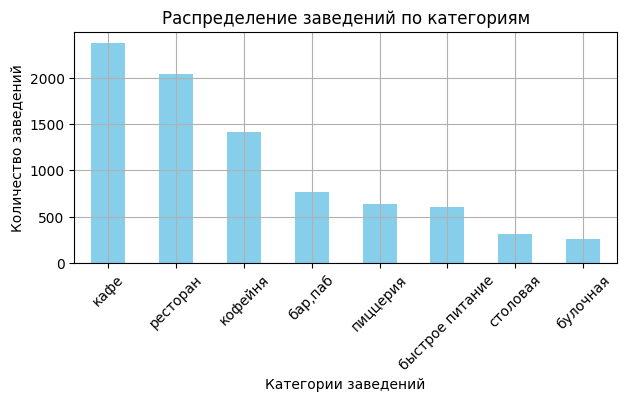

In [37]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму
df['category'].value_counts().sort_values(ascending=False).plot(kind='bar',
                                                                title='Распределение заведений по категориям',
                                                                xlabel='Категории заведений',
                                                                ylabel='Количество заведений',
                                                                rot=45,
                                                                color='skyblue')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

В выборке наиболее широко представлены кафе (2376), рестораны (2042) и кофейни (1413) — на них приходится основная доля заведений. Это может указывать на высокую конкуренцию и насыщенность рынка в этих сегментах. Бары и пабы (764), пиццерии (633), а также заведения быстрого питания (603) образуют следующий по численности кластер. Категории вроде столовых (315) и булочных (256) представлены в меньшем объёме. Это может указывать либо на меньшую популярность/востребованность, либо на менее активную цифровую репрезентацию этих форматов.

---

### Исследование распределение заведений по районам

Разберём столбцец `district`, который хранит данные о местоположении заведения. Для удобства и более лаконичных визуализаций создадим дополнительный столбец `district_short` с сокращенным названием районов (например, Центральный административный округ — ЦАО) и в дальнейшем будем работать с ним.

In [38]:
# Создаём новый столбец с сокращенными названиями районов
district_renames = {
       'Северный административный округ': 'САО',
       'Северо-Восточный административный округ': 'СВАО',
       'Северо-Западный административный округ': 'СЗАО',
       'Западный административный округ': 'ЗАО',
       'Центральный административный округ': 'ЦАО',
       'Восточный административный округ': 'ВАО',
       'Юго-Восточный административный округ': 'ЮВАО',
       'Южный административный округ': 'ЮАО',
       'Юго-Западный административный округ': 'ЮЗАО'
}

df['district_short'] = df['district'].replace(district_renames)

# Проверяем изменения
df[['district', 'district_short']].sample(n=5, random_state=45)

,district,district_short
id,,
44dbee95ac6f454886c717e3bed832d3,Восточный административный округ,ВАО
7cefa9f8ff9542d2b75f40a538c686ab,Северо-Восточный административный округ,СВАО
ca758b3cffa84f3e8b6722a27926bbd3,Северо-Восточный административный округ,СВАО
933b4cdbcbcb4fd6b2b9d32d92f9fae1,Южный административный округ,ЮАО
c8373602ebbf4fc483b46c42091ddf5a,Северный административный округ,САО


Исследуем распределение количества заведений по районам Москвы и построим график.

In [39]:
# Проверяем распределение данных по значениям столбца district
df['district_short'].value_counts().sort_values(ascending=False)

district_short
ЦАО     2242
САО      898
ЮАО      892
СВАО     890
ЗАО      850
ВАО      798
ЮВАО     714
ЮЗАО     709
СЗАО     409
Name: count, dtype: int64

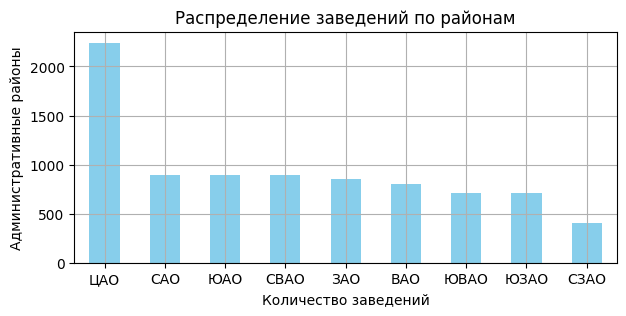

In [40]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим линейчатую диаграмму
df['district_short'].value_counts().sort_values(ascending=False).plot(kind='bar',
                                   title='Распределение заведений по районам',
                                   xlabel='Количество заведений',
                                   ylabel='Административные районы',
                                   rot=0,
                                   color='skyblue')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Больше всего заведений сосредоточено в Центральном административном округе — более 2200. Это больше чем в два раза превышает количество заведений в любом другом округе. На втором и третьем месте — Северный и Южный округа с сопоставимым количеством заведений (около 890). Наименьшее число заведений — в СЗАО. Это стоит учесть при выборе локаций для открытия новых точек — например, рассмотреть менее насыщенные, но перспективные районы.

Теперь изучим распределение заведений каждой категории в Центральном административном округе и построим график.

In [41]:
# Проверяем распределение заведений по категориям в Центральном административном округе
df[df['district_short'] == 'ЦАО'].groupby('category').size().sort_values(ascending=False)

category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
dtype: int64

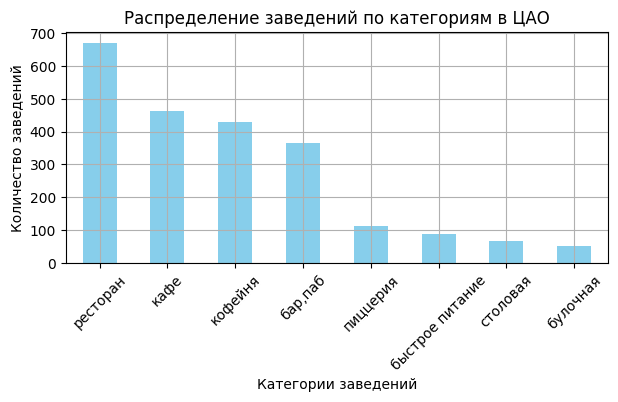

In [42]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму
df[df['district'] == 'Центральный административный округ'].groupby('category').size().sort_values(ascending=False).plot(kind='bar',
                                                                                                                        title='Распределение заведений по категориям в ЦАО',
                                                                                                                        xlabel='Категории заведений',
                                                                                                                        ylabel='Количество заведений',
                                                                                                                        rot=45,
                                                                                                                        color='skyblue')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

В Центральном административном округе доминируют рестораны (670), кафе (464) и кофейни (428) — для успешного продвижения в ЦАО важно учитывать насыщенность рынка этими форматами. Бары и пабы (364) также занимают заметную нишу. Пиццерии, заведения быстрого питания, столовые и булочные представлены значительно меньше, однако могут быть востребованы определёнными сегментами аудитории (например, офисные работники, туристы).

---

### Исследование распределение сетевых и несетевых заведений

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.

In [43]:
# Проверяем распределение заведений в абсолютном значении
df['chain'].value_counts()

chain
0    5199
1    3203
Name: count, dtype: int64

In [44]:
# Проверяем распределение заведений в относительном значении
df['chain'].value_counts(normalize=True)

chain
0    0.618781
1    0.381219
Name: proportion, dtype: float64

В Москве больше всего несетевых заведений — их около 62%. Это говорит о большом количестве уникальных, авторских мест с собственной концепцией. При этом почти 40% составляют сетевые точки, что показывает высокую популярность узнаваемых и проверенных форматов.

Теперь изучим соотношение сетевых и несетевых заведений в разрезе категорий.

In [45]:
# Проверяем распределение сетевых и несетевых заведений по категориям в абсолютном значении
df.groupby('category')['chain'].value_counts()

category         chain
бар,паб          0         596
                 1         168
булочная         1         157
                 0          99
быстрое питание  0         371
                 1         232
кафе             0        1597
                 1         779
кофейня          1         720
                 0         693
пиццерия         1         330
                 0         303
ресторан         0        1313
                 1         729
столовая         0         227
                 1          88
Name: count, dtype: int64

In [46]:
# Проверяем распределение сетевых и несетевых заведений по категориям в относительном значении
df.groupby('category')['chain'].value_counts(normalize=True)

category         chain
бар,паб          0        0.780105
                 1        0.219895
булочная         1        0.613281
                 0        0.386719
быстрое питание  0        0.615257
                 1        0.384743
кафе             0        0.672138
                 1        0.327862
кофейня          1        0.509554
                 0        0.490446
пиццерия         1        0.521327
                 0        0.478673
ресторан         0        0.642997
                 1        0.357003
столовая         0        0.720635
                 1        0.279365
Name: proportion, dtype: float64

Чтобы сделать корректные выводы, отразим распределение на графике. Поскольку категории в датасете представлены неравномерно (в кафе и ресторанах больше заведений, в столовых и булочных меньше), вместо абсолютных значений возьмём соотношение долей сетевых и несетевых заведений по категориям.

<Figure size 700x300 with 0 Axes>

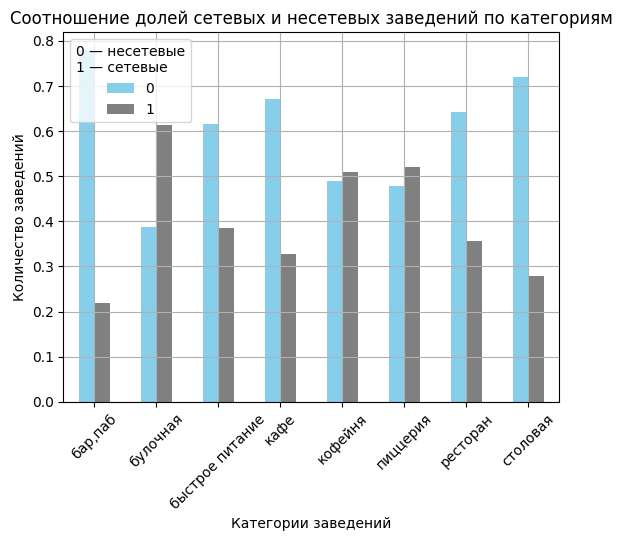

In [47]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Задаём цыета для категорий
colors = ['skyblue', 'grey']

# Создаём столбчатую диаграмму
df.groupby('category')['chain'].value_counts(normalize=True).unstack().plot(kind='bar',
                                              title='Соотношение долей сетевых и несетевых заведений по категориям',
                                              xlabel='Категории заведений',
                                              ylabel='Количество заведений',
                                              rot=45,
                                              legend=True,
                                              color=colors)

# Добавляем заголовок легенды
plt.legend(title='0 — несетевые\n1 — сетевые')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Наибольшая доля несетевых заведений наблюдается среди баров и пабов, столовых и кафе — здесь преобладают авторские и независимые форматы. В ресторанах и заведениях быстрого питания также чаще встречаются несетевые точки. Сетевые форматы доминируют в категориях булочных, кофеен и пиццерий — эти сегменты активнее развиваются по франшизной модели или в рамках сетей.

---

### Исследование количества посадочных мест

Посмотрим на распределение количества посадочных мест в заведениях Москвы.

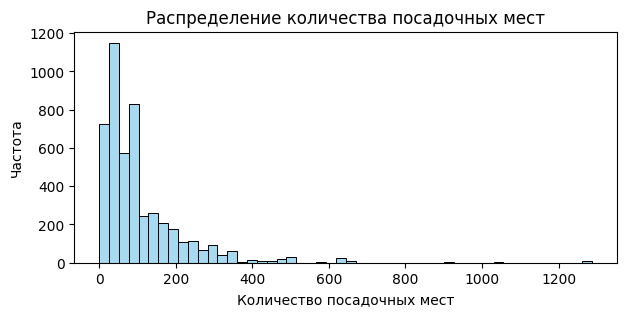

In [48]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим график распределения
sns.histplot(data=df, x='seats', bins=50, color='skyblue')

# Настраиваем подписи
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')

# Выводим график
plt.show()

Большинство заведений — небольшие: основной пик приходится на диапазон до 100 посадочных мест. Распределение сильно скошено вправо: наблюдается длинный «хвост» из заведений с большим числом мест (до 1200). С большой долей вероятности это выбросы. Они могут отражать реальные особенности формата — например, крупные столовые, рестораны в ТЦ, банкетные залы или сетевые заведения, ориентированные на массовый поток гостей. Также не исключены ошибки в данных — например, вместо числа посадочных мест могли указать количество клиентов в день или допустить опечатку (1000 вместо 100). Чтобы уточнить выводы, построим диаграмму размаха.

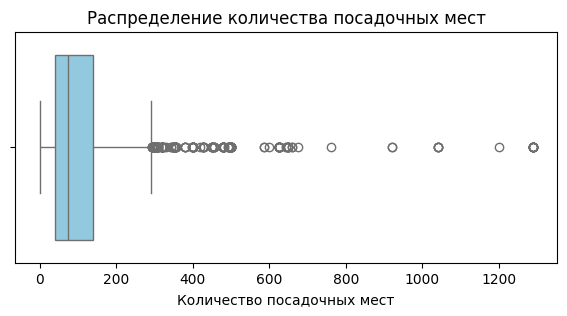

In [49]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим диаграмму размаха
sns.boxplot(data=df, x='seats', color='skyblue')

# Настраиваем подписи
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')

# Выводим график
plt.show()

В таком виде график трудно читать: из-за большого числа выбросов с крайне высокими значениями распределение выглядит сжатым. Чтобы упростить визуальный анализ, скроем выбросы.

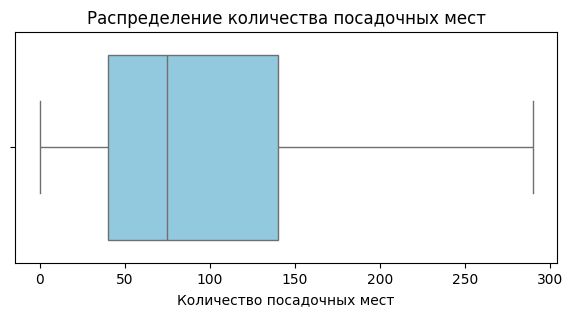

In [50]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим диаграмму размаха
sns.boxplot(data=df, x='seats', color='skyblue', showfliers=False) # Убираем выбросы

# Настраиваем подписи
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')

# Выводим график
plt.show()

По графику видно, что большинство заведений укладывается в диапазон до 280 мест, при этом 50% — от 40 до 140, а медианное значение — около 75. Это указывает на то, что рынок преимущественно представлен заведениями небольшого и среднего формата.

Теперь узнаем наиболее типичное количество посадочных мест для каждой категории заведений. Нагляднее всего это получится увидеть на графике.

In [51]:
#Готовим данные для построения графика
order = df.groupby('category')['seats'].median().sort_values(ascending=False).index

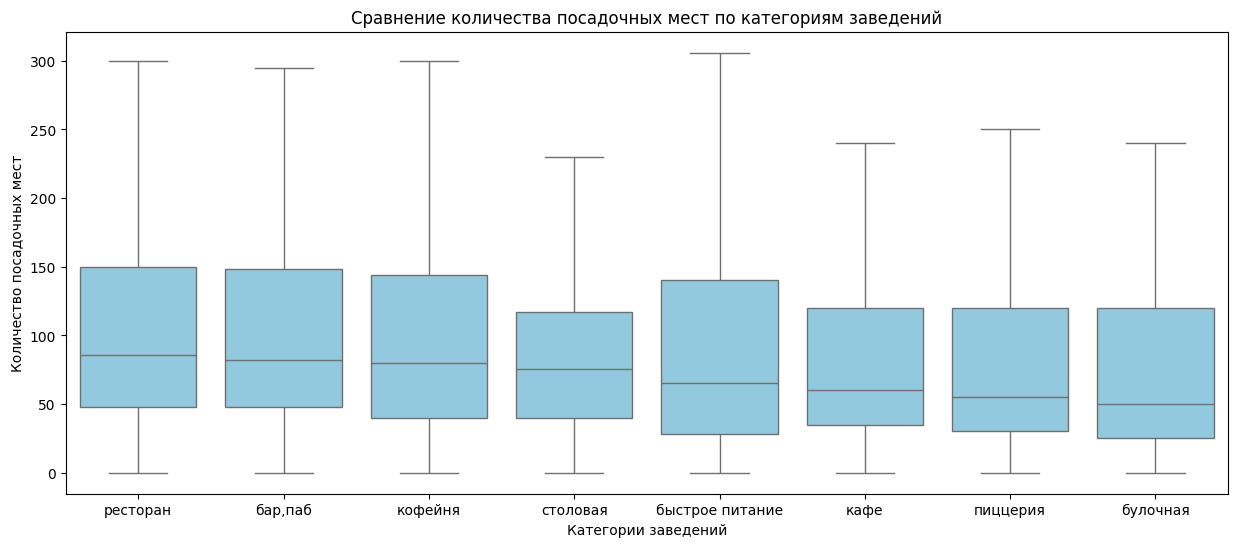

In [52]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 6))

# Строим диаграмму размаха
sns.boxplot(data=df, x='category', y='seats', order=order, color='skyblue', showfliers=False)
 
# Настраиваем подписи
plt.title('Сравнение количества посадочных мест по категориям заведений')
plt.xlabel('Категории заведений')
plt.ylabel('Количество посадочных мест')

#Выводим график
plt.show()

Медианные значения для ресторанов, баров и кофеен — около 80 посадочных мест, это можно взять за ориентир при открытии заведения такого формата. Столовые обычно немного меньше и при этом довольно однородны по размеру. В категории быстрого питания медиана составляет около 65 мест, но встречаются как очень компактные, так и довольно просторные заведения. Самые небольшие форматы — кафе, пиццерии и булочные, с медианой от 50 до 60 мест.

---

### Исследование рейтинга заведений

Для начала найдём усреднённые рейтинги для разных категорий заведений. Узнаем, есть ли различия, и если есть — насколько сильные.

In [53]:
df.groupby('category')['rating'].mean().sort_values(ascending=False)

category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290401
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.124284
быстрое питание    4.050249
Name: rating, dtype: float32

Наивысшие оценки получают бары и пабы (средняя оценка — 4,39), за ними следуют пиццерии и рестораны. Ниже всего оцениваются кафе и заведения быстрого питания — 4,12 и 4,05 соответственно. В целом можно сказать, что разница между категориями не радикальная. Визуализируем на графике.

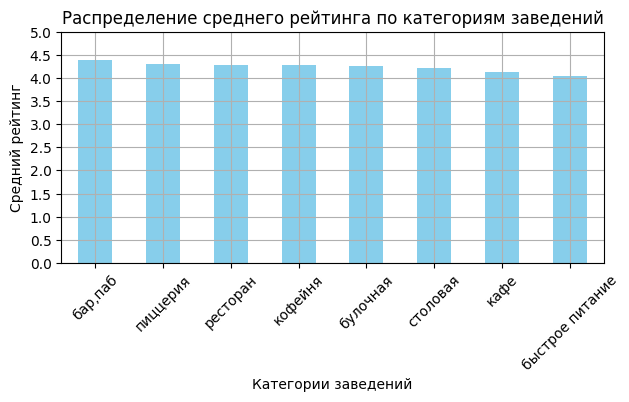

In [54]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму
df.groupby('category')['rating'].mean().sort_values(ascending=False).plot(kind='bar',
                                                                          title='Распределение среднего рейтинга по категориям заведений',
                                                                          xlabel='Категории заведений',
                                                                          ylabel='Средний рейтинг',
                                                                          rot=45,
                                                                          color='skyblue')

# Добавляем сетку графика
plt.grid()

# Настраиваем деления оси y
plt.yticks([i * 0.5 for i in range(11)])


# Выводим график
plt.show()

На графике видно, что средние рейтинги разных категорий в целом близки, однако у баров он немного выше остальных. При этом ранее мы выяснили, что баров заметно меньше, чем, например, кафе, ресторанов и кофеен — как в целом по Москве, так и в ЦАО. Это может указывать на неперенасыщенный рынок с высокой лояльностью аудитории. В дальнейшем стоит проанализировать, что объединяет успешные бары: расположение, формат, интерьер, ценовой сегмент, наличие событий (например, квизы или живая музыка) — чтобы адаптировать эти практики в своём проекте.

---

### Анализ корреляции рейтинга и других параметров

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений. Для этого построим матрицу корреляции рейтинга заведения с разными данными: его категорией, положением, статусом сетевого заведения, количеством мест, ценовой категорией и режимом работы.

In [55]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['rating', 'category', 'district', 'chain', 'seats',
                         'price_level', 'is_24_7']].phik_matrix()

# Выводим результат
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['rating', 'chain', 'seats', 'is_24_7']


,rating
price_level,0.298627
category,0.198739
district,0.189453
is_24_7,0.185933
chain,0.118857
seats,0.000000


Для более наглядной визуализации построим тепловую карту.

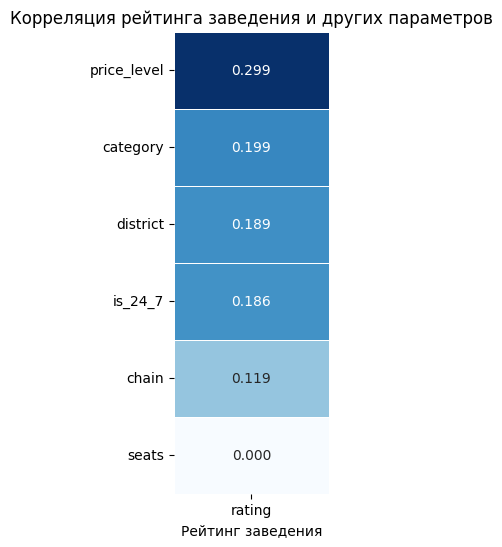

In [56]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(2, 6))

# Строим тепловую карту
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.3f', # Форматируем значения корреляции: два знака после точки
            cmap='Blues', # Устанавливаем цветовую гамму
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Корреляция рейтинга заведения и других параметров')
plt.xlabel('Рейтинг заведения')
plt.yticks(rotation=0)  # <-- Поворачиваем подписи на оси Y

# Выводим график
plt.show()

Наиболее заметная корреляция рейтинга заведения наблюдается с уровнем цен. Изучим эту взаимосвязь подробнее: построим график и посмотрим, как меняется средний рейтинг в зависимости от ценового сегмента.

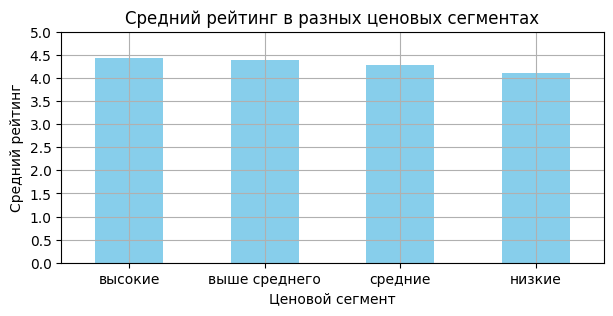

In [57]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))


# Строим столбчатую диаграмму
df.groupby('price_level')['rating'].mean().sort_values(ascending=False).plot(kind='bar',
                                                                             title='Средний рейтинг в разных ценовых сегментах',
                                                                             xlabel='Ценовой сегмент',
                                                                             ylabel='Средний рейтинг',
                                                                             rot=0,
                                                                             color='skyblue')
# Настраиваем деления оси y
plt.yticks([i * 0.5 for i in range(11)])

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()                       

На графике прослеживается положительная зависимость: чем выше ценовой сегмент, тем выше средний рейтинг. Это не обязательно означает, что дорогие заведения объективно лучше, однако они, как правило, предлагают более высокий уровень сервиса, еды и атмосферы, оправдывая тем самым ожидания гостей.

---

### Исследование топовых сетевых заведений

Найдём топ-15 сетей в Москве по количеству заведений и вычислим их средний рейтинг.

In [58]:
# Найдём топ-15 сетей по количеству точек, отобразим категорию и средний рейтинг
top_15 = (
    df[df['chain'] == 1]
    .groupby(['name', 'category'])
    .agg(count=('name', 'count'), rating=('rating', 'mean'))
    .sort_values(by='count', ascending=False)
    .head(15).reset_index()
)
top_15 = top_15.set_index('name')
top_15

,category,count,rating
name,,,
шоколадница,кофейня,119,4.178151
домино'с пицца,пиццерия,76,4.169737
додо пицца,пиццерия,74,4.286487
one price coffee,кофейня,71,4.064789
яндекс лавка,ресторан,69,3.872464
cofix,кофейня,65,4.075385
prime,ресторан,49,4.114285
кофепорт,кофейня,42,4.147619
кулинарная лавка братьев караваевых,кафе,39,4.394872


Построим визуализации для более наглядного отображения данных.

<Figure size 700x300 with 0 Axes>

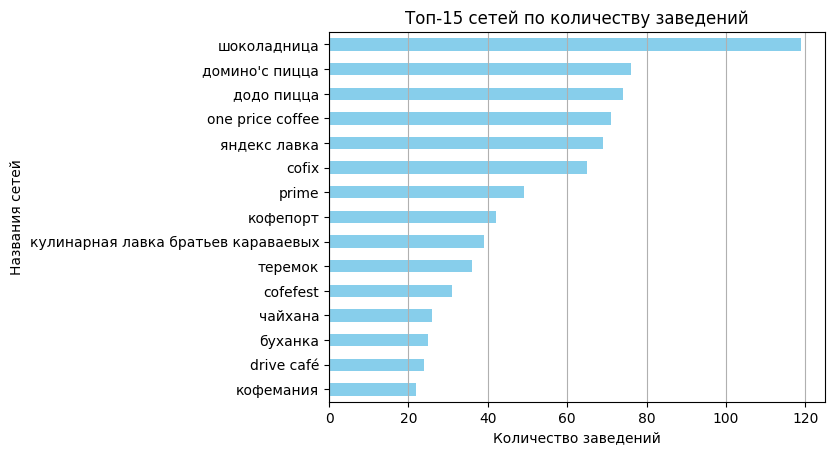

In [59]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим линейчатую диаграмму
top_15[['category', 'count']].plot(kind='barh',
                                   title='Топ-15 сетей по количеству заведений',
                                   xlabel='Количество заведений',
                                   ylabel='Названия сетей',
                                   legend=False,
                                   color='skyblue')

# Меняем порядок сортировки
plt.gca().invert_yaxis()

# Добавляем сетку графика 
plt.grid(axis='x')

# Выводим график
plt.show()

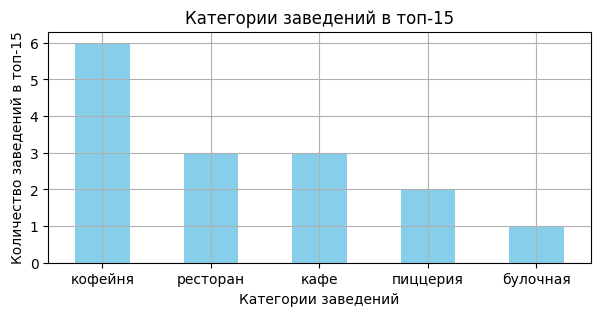

In [60]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим солбчатую диаграмму
top_15.groupby('category')['count'].size().sort_values(ascending=False).plot(kind='bar',
                                                title='Категории заведений в топ-15',
                                                xlabel='Категории заведений',
                                                ylabel='Количество заведений в топ-15',
                                                rot=0,
                                                color='skyblue')

# Добавляем сетку графика 
plt.grid()

# Выводим график
plt.show()

In [61]:
# Найдём общий средний рейтинг заведений в топ-15
top_15['rating'].mean()

np.float32(4.1491704)

В рейтинге сетей по количеству точек первое место занимает кофейня «Шоколадница» — 119 заведений. С заметным отставанием следуют пиццерии «Домино'с пицца» (76 точек) и «Додо пицца» (71 точка). В целом в топ-15 сетей больше всего представлено кофеен (6 из 15), затем идут кафе и рестораны (по 3), а также 2 пиццерии и булочная. Среди кофеен на первом месте «Шоколадница» (199 точек), среди кафе — «Кулинарная лавка братьев Караваевых» (39 точек),  среди ресторанов — «Яндекс Лавка» (69 точек), среди пиццерий — «Домино'с пицца» (76 точек). У булочной «Буханка» 25 точек по Москве. Общий средний рейтинг заведений из топ-15 составляет 4,15 балла — это довольно умеренный показатель, что может говорить о компромиссе между масштабом сетей и качеством. Для многих гостей важны стабильность и доступность, но такие заведения реже получают высокие оценки за качество сервиса, атмосферу или еду.

---

### Исследование среднего чека

Исследуем вариации среднего чека в зависимости от расположения заведения и построим диаграммы размаха для наглядности.

In [62]:
# Найдем средний чек заведений в зависимости от их расположения
df.groupby('district_short')['avg_bill_price'].median().sort_values(ascending=False)

district_short
ЗАО     1000.0
ЦАО     1000.0
СЗАО     700.0
САО      650.0
ЮЗАО     600.0
ВАО      575.0
СВАО     500.0
ЮАО      500.0
ЮВАО     450.0
Name: avg_bill_price, dtype: float32

In [63]:
#Готовим данные для построения графика
order = df.groupby('district_short')['avg_bill_price'].median().sort_values(ascending=False).index

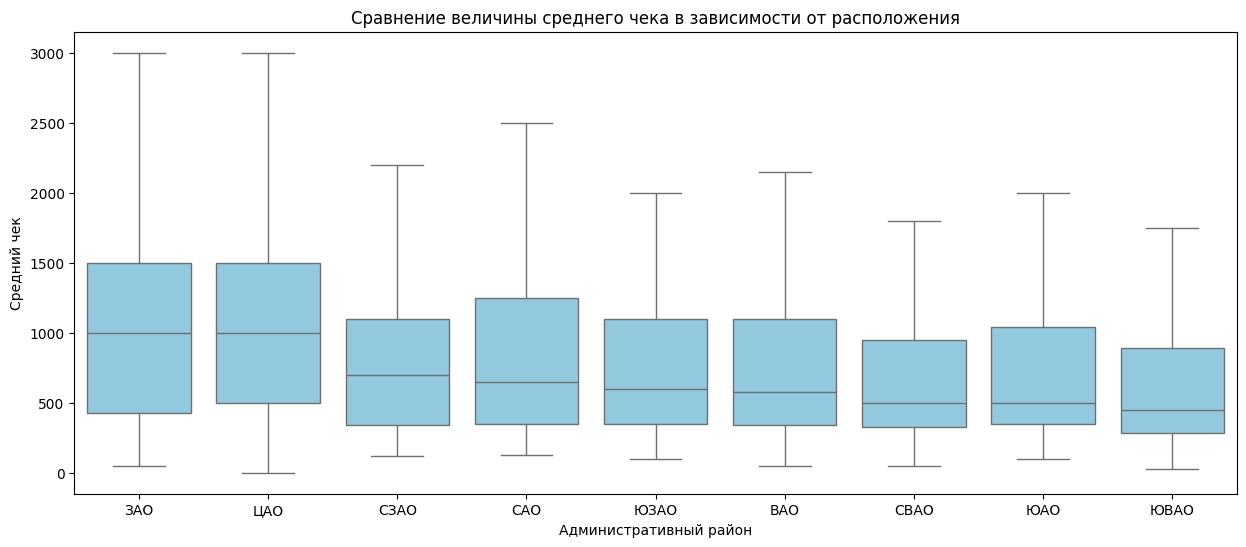

In [64]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 6))

# Строим диаграмму размаха
sns.boxplot(data=df, x='district_short', y='avg_bill_price', order=order, color='skyblue', showfliers=False)
 
# Настраиваем подписи
plt.title('Сравнение величины среднего чека в зависимости от расположения')
plt.xlabel('Административный район')
plt.ylabel('Средний чек')

#Выводим график
plt.show()

Самые высокие медианные значения среднего чека наблюдаются в ЦАО и ЗАО — около 1000 рублей. В отдалённых районах, таких как ЮВАО, ЮАО, СВАО и ВАО, медиана среднего чека заметно ниже — около 500 рублей. График показывает, что с удалением от центра Москвы цены в заведениях, как правило, снижаются.

Разброс среднего чека особенно высок в ЦАО и ЗАО, где максимальные значения доходят до 3000 рублей — это может указывать на наличие как демократичных, так и премиальных заведений. В менее центральных округах разброс тоже значительный, но чаще ограничивается значениями до 2000 рублей. Это говорит о том, что даже в спальных районах встречаются заведения с высокими ценами, но в целом диапазон цен там уже, а средний чек ниже, чем в центральных округах. 

---

### Промежуточные выводы по исследовательскому анализу

Исследовательский анализ данных позволил выявить следующие закономерности:

- В рассматриваемом датасете наибольшее количество объектов относится к категориям кафе, ресторанов и кофеен. Вслед за ними по численности идут бары и пабы, пиццерии и заведения быстрого питания. Меньше всего представлено столовых и булочных. Такая структура может отражать как особенности реального рынка, так и специфику формирования выборки.

- Больше всего заведений зафиксировано в Центральном административном округе — более 2200 объектов. Это более чем вдвое превышает показатели любого другого округа. Следом идут Северный и Южный округа с сопоставимыми значениями (около 890). Меньше всего заведений представлено в СЗАО.

- В ЦАО преобладают рестораны, кафе и кофейни. Бары и пабы также представлены в заметном количестве, в то время как другие форматы — пиццерии, фастфуд, столовые и булочные — встречаются реже.

- По типу принадлежности большинство заведений в датасете являются несетевыми (около 62%). Наибольшая доля несетевых точек наблюдается среди баров, кафе и столовых. Сетевые форматы более распространены среди кофеен, пиццерий и булочных.

- Основная масса заведений в выборке относится к небольшим и средним по размеру форматам: чаще всего встречаются заведения с числом посадочных мест до 100, медианное значение — около 75. В данных присутствуют выбросы (до 1200 посадочных мест). Они могут как отражать реальные особенности формата (например, крупные столовые, рестораны в ТЦ, банкетные залы или сетевые заведения, ориентированные на массовый поток гостей), так и ошибки в данных.

- Внутри категорий медианные значения различаются: рестораны, бары и кофейни — около 80 мест. Столовые немного меньше и при этом довольно однородны по размеру. В категории быстрого питания медиана составляет около 65 мест, но встречаются как очень компактные, так и довольно просторные заведения. Самые небольшие форматы — кафе, пиццерии и булочные, с медианой от 50 до 60 мест.

- Средние пользовательские рейтинги по категориям незначительно различаются: наивысшие значения наблюдаются у баров и пабов (4,39), немного ниже — у пиццерий и ресторанов. Кафе и заведения быстрого питания в среднем оцениваются ниже остальных.

- Наиболее сильная положительная связь рейтинга наблюдается с ценовой категорией: более дорогие заведения в среднем получают более высокие оценки. Также рейтинг коррелирует с категорией заведения, расположением и круглосуточностью работы. Связь с другими признаками (сетевой формат, количество мест) выражена слабо или отсутствует.

- В топ-15 сетей по количеству точек лидируют «Шоколадница» (119 заведений), «Домино'с пицца» (76 точек) и «Додо пицца» (71 точка). В целом в рейтинге больше всего представлено кофеен (6 из 15). Общий средний рейтинг у топ-15 сетей — около 4,15.

- Самые высокие медианные значения среднего чека зафиксированы в ЦАО и ЗАО (около 1000 рублей), в то время как в отдалённых округах этот показатель составляет около 500 рублей. Разброс значений чека выше в центральных округах, где встречаются как демократичные, так и премиальные форматы.

---

## Итоговый вывод и рекомендации

### Общий обзор проделанной работы

В рамках проекта был проведён исследовательский анализ рынка заведений общественного питания Москвы. Исследование основывалось на датасете, составленном по данным сервисов Яндекс Карты и Яндекс Бизнес летом 2022 года. 

На этапе предобработки данных были приведены в порядок названия столбцов, устранены дубликаты, оптимизирован тип данных для числовых столбцов, проанализированы и частично обработаны пропуски. Также был создан новый признак, отражающий круглосуточный режим работы.

В ходе анализа были изучены факторы, которые могут повлиять на выбор подходящего формата и локации заведения. Проанализированы представленные в датасете категории заведений, территориальное распределение по округам, соотношение сетевых и несетевых форматов, характерное количество посадочных мест для разных категорий, распределение и зависимость рейтингов, крупнейшие сети по количеству точек и ценовая политика в разных районах.

---

### Главные выводы

**Категории заведений.**
Наиболее широко в датасете представлены кафе (2376), рестораны (2042) и кофейни (1413). Также встречаются бары (764), пиццерии (633), заведения быстрого питания (603), столовые (315) и булочные (256). Такая структура может отражать как реальные пропорции, так и особенности сбора данных.

**Административные округа.**
Больше всего заведений находится в Центральном административном округе — более 2200 точек, что более чем вдвое превышает значения других округов. Внутри ЦАО доминируют рестораны, кафе, кофейни и бары. Наименьшее количество объектов зафиксировано в СЗАО (409 заведений).

**Сетевые и несетевые заведения.**
В целом несетевых точек больше (около 62%). Сетевые форматы особенно распространены среди булочных (61%), пиццерий (52%) и кофеен (51%). В то же время бары (78%), столовые (72%) и кафе (67%) чаще работают в формате одиночных заведений.

**Посадочные места.**
Большинство заведений рассчитано на 25–100 посетителей, медианное значение — около 75 мест. В данных встречаются аномально высокие значения (до 1200 посадочных мест), что отражать как реальные особенности (крупные столовые, банкетные залы), так и ошибки в данных. Самыми вместительными являются рестораны, бары и кофейни (около 80 мест), а наиболее компактными — кафе, пиццерии и булочные (50-60 мест).

**Рейтинги.**
Средние пользовательские рейтинги по категориям схожи: все значения укладываются в диапазон от 4,1 до 4,4. Немного выше остальных оцениваются бары (4,39). Кафе (4,12) и фастфуд (4,05) оцениваются ниже всего. Различия между категориями в целом невелики.

**Факторы, связанные с рейтингом.**
Наиболее сильная положительная связь рейтинга наблюдается с ценовой категорией (сила корреляции 0,3): более дорогие заведения в среднем получают более высокие оценки. На втором месте по силе корреляции — категория заведения (0,2).

**Крупнейшие сети.**
В топ-15 по количеству точек лидером является кофейня «Шоколадница» со 199 точками. За ней с большим отрывом идут пиццерии «Домино'с» и «Додо» (около 75 точек). Средние рейтинги по сетям варьируются от 3,9 у ресторана «Яндекс Лавка» до 4,5 у кофейни «Кофемания». 

**Средний чек и география.**
В ЦАО и ЗАО средний чек заметно выше — около 1000 рублей. В удалённых от центра округах (СВАО, ЮАО, ЮВАО) этот показатель составляет около 500 рублей. Таким образом, можно наблюдать чёткую зависимость стоимости от расположения заведения — ближе к центру города цены выше.

---

### Рекомендации

На основе проведённого анализа можно рассмотреть следующие идеи и направления при выборе концепции и расположения будущего заведения:

1. ЦАО может быть привлекательным выбором, если важны высокая проходимость, платёжеспособная аудитория и готовность гостей к более высокому среднему чеку. Здесь зафиксирована одна из самых высоких медиан среднего чека среди всех округов Москвы (сопоставима лишь с ЗАО). Однако важно учитывать и высокую конкуренцию — в ЦАО сосредоточено наибольшее количество заведений, особенно кафе, ресторанов и кофеен. Возможно, имеет смысл обратить внимание на категории, которые представлены менее широко. Это позволит занять нишу даже в районе с высокой плотностью заведений.

2. Если приоритет — масштабируемость и стабильная бизнес-модель, можно обратить внимание на категории с высокой долей сетевых заведений, такие как кофейни и пиццерии. Эти форматы хорошо себя зарекомендовали в сетевом сегменте, предполагают стандартизированные процессы, понятный продукт и устойчивый спрос. Тем не менее важно учитывать, что в этих категориях уже присутствуют крупные игроки, такие как «Шоколадница», Domino’s, Додо Пицца. Это означает высокую конкуренцию, но также предоставляет возможность изучить существующие бизнес-модели. При этом можно искать нишевые форматы внутри этих сегментов — например, спешелти-кофейни или пиццерии с оригинальной концепцией, — которые будут выделяться на фоне крупных сетей.

4. Бары получают наивысшие пользовательские рейтинги среди всех категорий, при этом они встречаются гораздо реже, чем кафе, рестораны и кофейни — как в целом по Москве, так и в ЦАО. Это может свидетельствовать о неперенасыщенном рынке и высокой лояльности аудитории. Возможно, стоит подробнее изучить, что объединяет успешные бары — например, особенности формата, расположение, интерьер, событийную программу (квизы, диджей-сеты, живая музыка), ценовой сегмент. Это поможет сформировать сильную концепцию, адаптированную к спросу.

5. Анализ показал, что заведения с более высокой ценовой категорией в среднем получают более высокие оценки. Это не обязательно означает их объективное превосходство, но, как правило, более дорогие форматы обладают большим ресурсом для того, чтобы обеспечить высокий уровень сервиса, кухни и атмосферы — что помогает оправдать ожидания гостей. Тем не менее высокие оценки возможны и в среднем или доступном сегменте. Сильную репутацию можно построить за счёт внимания к качеству продукта, работе команды и удобству для посетителей. Если цель — добиться высоких пользовательских оценок, важно не столько ориентироваться на ценник, сколько на соответствие формата ожиданиям своей аудитории.

6. Если задача — минимизировать конкуренцию, стоит обратить внимание на районы за пределами ЦАО. В центре плотность заведений больше чем в два раза выше, чем в других районах, что может создавать сложности. Например, в Западном административном округе заведений меньше, чем в ЦАО, но медиана среднего чека сопоставима. Это может быть удачным сочетанием: платежеспособная аудитория и меньшее количество конкурентов.

7. Оптимальной может быть вместимость в диапазоне 50–100 посадочных мест. Это наиболее распространённый формат среди заведений в выборке. Он может обеспечивать стабильный поток гостей без чрезмерной нагрузки на персонал и аренду.